In [2]:
import jax
import jax.numpy as jnp
from jax import grad
import numpy as np
import matplotlib.pyplot as plt
from exojax.spec import lpf

In [193]:
def pseudoH(a,x):
    """
    p = fL/fG
    q = fL/f
    """
    p = a/np.sqrt(np.log(2.0))
    q = (p**-5 + 2.69269*p**-4 + 2.42843*p**-3 + 4.47163*p**-2 + 0.07842*p**-1 + 1)**(-1.0/5.0)
    eta = 1.36603*q - 0.47719*q**2 + 0.11116*q**3
    mask=eta > 1.0
    eta[mask]=1.0
    mask=eta<0.0
    eta[mask]=0.0
    return eta/np.sqrt(np.pi)*a/(x**2+a**2) + (1.0-eta)*np.exp(-x**2)

In [249]:
def Tc(a,x,crit=0.0):
    """Tc Function = Tepper-Garc'ia  Function w/ the inner correction: Tc(a,x)
    
    Args:
        a: float/nd array
            parameter 
        x: float/nd array
           parameter

    Returns:
        g: float/ndarary
           Tc(a,x)

    """
    h=np.exp(-x*x)
    gg=h - a*(h*h*(4*x**4+7*x**2+4+1.5*x**-2)-1.5*x**-2-1)/x**2/np.sqrt(np.pi)
    g=np.where(np.abs(x)<crit,h - 2.0*a/np.sqrt(np.pi)*(1-2*x**2),gg)
    return g

In [27]:
#H(a,x)=Re[w(x+ia)] and w is Faddeeva function from scipy
import scipy.special

def H(a,x):
    z=x+(1j)*a
    w = scipy.special.wofz(z)
    return w.real

def dH(x,a):
    z=x+(1j)*a
    w = scipy.special.wofz(z)
    return 2*(a*w.imag-x*w.real)

def fH(x):
    a=1.e-4
    b=a*1.e4
    g=H(x,a)
    tau=g*b
    return np.exp(-tau)   

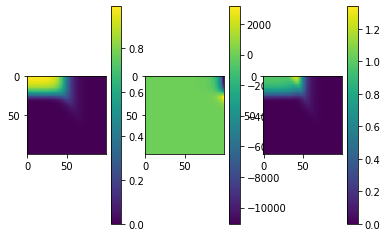

In [194]:
Na=100
#xarr=np.logspace(-1,3.3,Na)
xarr=np.logspace(-1,3,Na)
xarr=xarr[:,None]*np.ones((Na,Na))
#aarr=np.logspace(-1,3.3,Na)
aarr=np.logspace(-4,4,Na)
aarr=aarr[None,:]*np.ones((Na,Na))

fig=plt.figure()
ax=fig.add_subplot(131)
c=ax.imshow(H(aarr,xarr))
plt.colorbar(c)
ax=fig.add_subplot(132)
c2=ax.imshow(Tc(aarr,xarr))
plt.colorbar(c2)
ax=fig.add_subplot(133)
c3=ax.imshow(pseudoH(aarr,xarr))
plt.colorbar(c3)

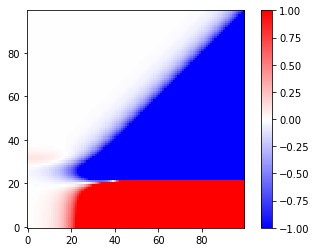

In [189]:
Na=100
xarr=np.logspace(-1,3.3,Na)
#xarr=np.logspace(-2,4,Na)
xarr=xarr[:,None]*np.ones((Na,Na))
aarr=np.logspace(-1,3.3,Na)
#aarr=np.logspace(-7,0,Na)
aarr=aarr[None,:]*np.ones((Na,Na))

fig=plt.figure()
ax=fig.add_subplot(111)
#c=ax.imshow(np.log10(np.abs(H(aarr,xarr)-Tc(aarr,xarr))/H(aarr,xarr)),cmap="bwr",vmin=-1,vmax=1)
c=ax.imshow(((H(aarr,xarr)-Tc(aarr,xarr))/H(aarr,xarr)),cmap="bwr",vmin=-1,vmax=1)
plt.colorbar(c)
plt.gca().invert_yaxis()

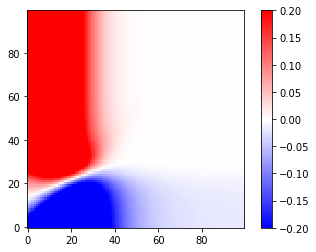

In [195]:
Na=100
xarr=np.logspace(-1,3.3,Na)
#xarr=np.logspace(-2,4,Na)
xarr=xarr[:,None]*np.ones((Na,Na))
aarr=np.logspace(-1,3.3,Na)
#aarr=np.logspace(-7,0,Na)
aarr=aarr[None,:]*np.ones((Na,Na))

fig=plt.figure()
ax=fig.add_subplot(111)
#c=ax.imshow(np.log10(np.abs(H(aarr,xarr)-pseudoH(aarr,xarr))/pseudoH(aarr,xarr)),cmap="bwr",vmin=-4,vmax=4)
c=ax.imshow(((H(aarr,xarr)-pseudoH(aarr,xarr))/H(aarr,xarr)),cmap="bwr",vmin=-0.2,vmax=0.2)
plt.colorbar(c)
plt.gca().invert_yaxis()

In [196]:
def combinedH(aarr,xarr):
    arr1=pseudoH(aarr,xarr)
    arr2=Tc(aarr,xarr)
    #mask=1.2*np.log10(aarr) - np.log10(xarr) <-0.2
    mask=(aarr) <1.0
    arr=np.copy(arr1)
    arr[mask]=arr2[mask]
    return arr

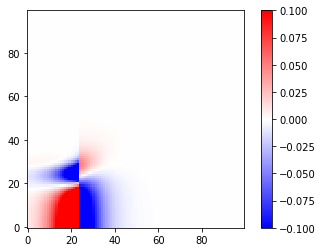

In [204]:
Na=100
xarr=np.logspace(-1,3.3,Na)
#xarr=np.logspace(-2,4,Na)
xarr=xarr[:,None]*np.ones((Na,Na))
aarr=np.logspace(-1,3.3,Na)
#aarr=np.logspace(-7,0,Na)
aarr=aarr[None,:]*np.ones((Na,Na))

fig=plt.figure()
ax=fig.add_subplot(111)
#c=ax.imshow(np.log10(np.abs(H(aarr,xarr)-combinedH(aarr,xarr))/combinedH(aarr,xarr)),cmap="bwr",vmin=-1,vmax=1)
c=ax.imshow(((H(aarr,xarr)-combinedH(aarr,xarr))),cmap="bwr",vmin=-0.1,vmax=0.1)
plt.colorbar(c)
plt.gca().invert_yaxis()

In [207]:
def etapseudoH(a,x):
    """
    p = fL/fG
    q = fL/f
    """
    p = a/np.sqrt(np.log(2.0))
    q = (p**-5 + 2.69269*p**-4 + 2.42843*p**-3 + 4.47163*p**-2 + 0.07842*p**-1 + 1)**(-1.0/5.0)
    eta = 1.36603*q - 0.47719*q**2 + 0.11116*q**3
    return eta

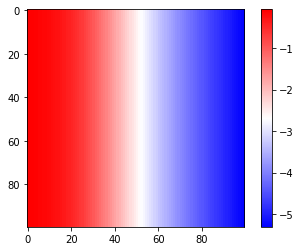

In [219]:
c=plt.imshow(np.log10(1.0-etapseudoH(aarr,xarr)),cmap="bwr")
plt.colorbar(c)
plt.show()

In [220]:
1.0-etapseudoH(np.array([100]),xarr)

array([0.00014362])

In [289]:
def pseudoH(a,x):
    """
    p = fL/fG
    q = fL/f
    """
    p = a/np.sqrt(np.log(2.0))
    q = (p**-5 + 2.69269*p**-4 + 2.42843*p**-3 + 4.47163*p**-2 + 0.07842*p**-1 + 1)**(-1.0/5.0)
    eta = 1.36603*q - 0.47719*q**2 + 0.11116*q**3
    #return (1.0-eta)*np.exp(-x**2)
    #return eta/np.sqrt(np.pi)*a/(x**2+a**2) 
    return eta/np.sqrt(np.pi)*a/(x**2+a**2) + (1.0-eta)*np.exp(-x**2)

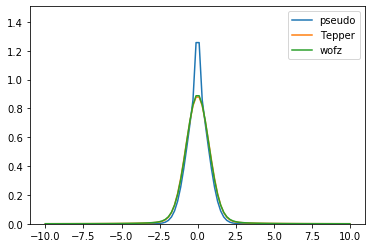

In [285]:
a=np.array([0.1])
xa=np.linspace(-10,10,100)
#plt.plot(xa,combinedH(a,xa),".",label="c")
plt.plot(xa,pseudoH(a,xa),label="pseudo")
plt.plot(xa,Tc(a,xa),label="Tepper")
plt.plot(xa,H(a,xa),label="wofz")
plt.ylim(0.,1.2*np.max(pseudoH(a,xa)))
plt.legend()

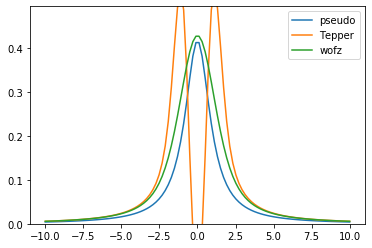

In [288]:
a=np.array([1.])
xa=np.linspace(-10,10,100)
#plt.plot(xa,combinedH(a,xa),".",label="c")
plt.plot(xa,pseudoH(a,xa),label="pseudo")
plt.plot(xa,Tc(a,xa),label="Tepper")
plt.plot(xa,H(a,xa),label="wofz")
plt.ylim(0.,1.2*np.max(pseudoH(a,xa)))
plt.legend()

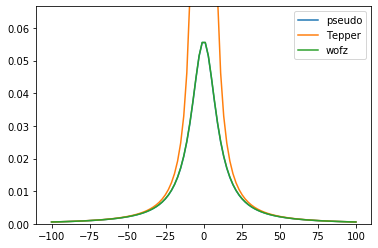

In [259]:
a=np.array([10])
xa=np.linspace(-100,100,100)
#plt.plot(xa,combinedH(a,xa),".",label="c")
plt.plot(xa,pseudoH(a,xa),label="pseudo")
plt.plot(xa,Tc(a,xa),label="Tepper")
plt.plot(xa,H(a,xa),label="wofz")
plt.ylim(0.,1.2*np.max(pseudoH(a,xa)))
plt.legend()

In [240]:
combinedH(a,xa)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 1